 ##### Ejemplos prácticos Data Science - Agustina Torres Moray.

## ARBOLES DE ENSAMBLE 2

### BAGGING / RANDOM FOREST / EXTRA TREES CLASSIFIER

#### Dataset

Trabajaremos con el siguiente dataset https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


#### Objetivo:

Predecir si lloverá o no al dia siguiente.

### DESARROLLO

#### 1 - Importar librerías necesarias.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#### 2 - EDA y Preprocesamiento

In [2]:
data = pd.read_csv("weatherAUS.csv.zip")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

Eliminamos del dataset las columnas con menos de 100.000 registros y aquellas que no aportan valor adicional a nuestro análisis (Location y Date).

In [7]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
data = data.drop(columns = ['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'])

In [9]:
data.shape

(145460, 17)

In [10]:
data.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Para simplificar el preprocesamiento eliminamos los registros con valores nulos y las columnas categóricas.

In [11]:
data = data.dropna()

In [12]:
data.shape

(112925, 17)

In [13]:
data.dtypes.loc[data.dtypes=="object"]

WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [14]:
columnas_categoricas = ["WindGustDir","WindDir9am","WindDir3pm","RainToday"]

In [15]:
data = data.drop(columns=columnas_categoricas)

In [16]:
data.shape

(112925, 13)

In [17]:
data.value_counts('RainTomorrow')

RainTomorrow
No     87906
Yes    25019
dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

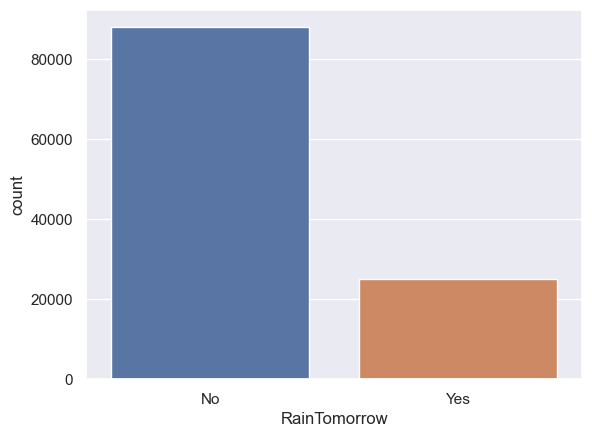

In [18]:
sns.countplot(x=data.RainTomorrow)

Para ver como se relacionan las variables (features) hacemos un pairplot.

In [19]:
#sns.pairplot(data.sample(frac = 0.1), hue='RainTomorrow', kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}})

<AxesSubplot:>

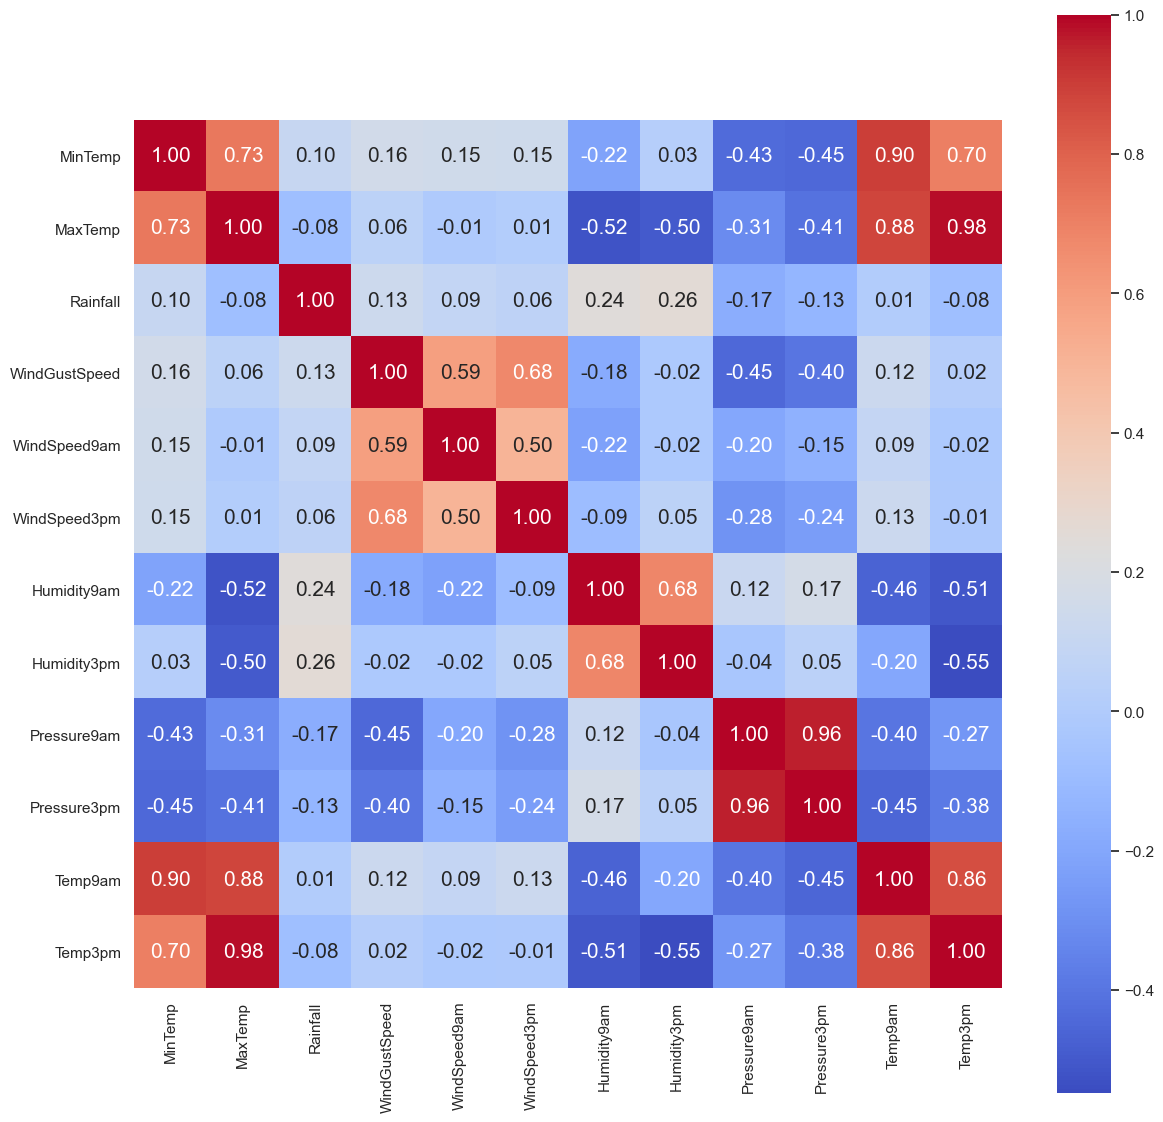

In [20]:
corr = data.drop(columns=['RainTomorrow']).corr(method="pearson")

plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = ['RainTomorrow']).columns,
           yticklabels= data.drop(columns = ['RainTomorrow']).columns,
           cmap= 'coolwarm')

Como podemos observar, hay algunas correlaciones fuertes entre variables, lo que no es bueno para el entrenamiento del modelo. Dicho esto vamos a eliminar las variables Temp3pm (fuertemente correlacionada con Max Temperatura) y Pressure9am (fuertemente relacionada con Pressure3pm).

In [21]:
data = data.drop(columns=["Temp3pm","Pressure9am"])

In [22]:
data.shape

(112925, 11)

A continuacion, convertimos la variable target (categórica) en una variable numérica (1/0).

In [23]:
data ["RainTomorrow"] = data["RainTomorrow"].map({'Yes':1,'No':0})

In [24]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,16.9,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,17.2,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,21.0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,18.1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,17.8,0


#### 3 - Separación de subconjuntos train - test

En este primer modelado, vamos a considerar dos variables para la matriz de features.

In [25]:
columnas_entrenamiento = ['MaxTemp', 'Humidity3pm']

In [26]:
X = data[columnas_entrenamiento]

In [27]:
y=data.RainTomorrow

Como podemos ver, las clases de la variable target estan desbalanceadas, lo que podemos comprobar calculando el accuracy de los siguientes modelos.

Modelo que siempre predice que SI va a llover

In [28]:
y_pred = np.ones(y.shape)
accuracy_unos = metrics.accuracy_score(y,y_pred)
print(accuracy_unos)

0.2215541288465796


Modelo que siempre predice que NO va a llover

In [29]:
y_pred = np.zeros(y.shape)
accuracy_ceros = metrics.accuracy_score(y,y_pred)
print(accuracy_ceros)

0.7784458711534205


Para contemplar este desbalaceo, vamos a usar la variable stratify en la generación de matrices.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

#### 4 -ENTRENAMIENTO DE MODELOS Y PREDICCIONES.

4.1 - BAGGING

In [31]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators=100, n_jobs=-1)

In [32]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1)

In [33]:
y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

In [34]:
print(metrics.accuracy_score(y_train,y_train_predict))
print(metrics.accuracy_score(y_test,y_test_predict))

0.8631700127772085
0.8045043981344826


4.2 - RANDOM FOREST

In [35]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features="sqrt", n_jobs=-1, oob_score=True, random_state=42)

In [36]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_jobs=-1, oob_score=True,
                       random_state=42)

In [37]:
y_test_predict = rf_clf.predict(X_test)
y_train_predict = rf_clf.predict(X_train)

In [38]:
print(metrics.accuracy_score(y_train,y_train_predict))
print(metrics.accuracy_score(y_test,y_test_predict))

0.8631447113742458
0.8035303146584805


Calculamos la precisión del modelo con la métrica de Out of Bag Score:

In [39]:
rf_clf.oob_score_

0.8037243665161233

Calculamos la importancia de cada feature en el modelo generado y lo representamos gráficamente.

In [40]:
rf_clf.feature_importances_

array([0.42866631, 0.57133369])

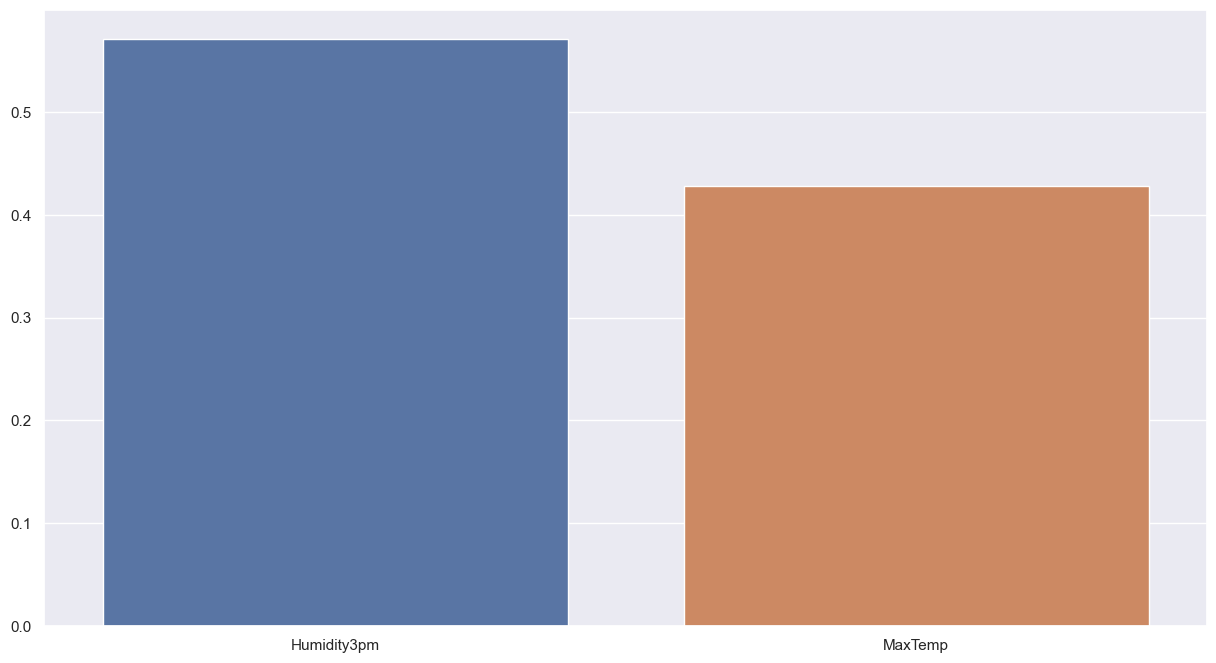

In [41]:
importances = rf_clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(x = columns[indices], y = importances[indices]);

Observamos las características de cada uno de los 100 estimadores definidos.

In [42]:
clf.estimators_

[DecisionTreeClassifier(random_state=1428605950),
 DecisionTreeClassifier(random_state=612166414),
 DecisionTreeClassifier(random_state=1683839644),
 DecisionTreeClassifier(random_state=2025113651),
 DecisionTreeClassifier(random_state=1715210289),
 DecisionTreeClassifier(random_state=1906025181),
 DecisionTreeClassifier(random_state=1603060776),
 DecisionTreeClassifier(random_state=1440570311),
 DecisionTreeClassifier(random_state=883197734),
 DecisionTreeClassifier(random_state=1682745814),
 DecisionTreeClassifier(random_state=197027769),
 DecisionTreeClassifier(random_state=1274595799),
 DecisionTreeClassifier(random_state=1718961194),
 DecisionTreeClassifier(random_state=2136659210),
 DecisionTreeClassifier(random_state=1073447467),
 DecisionTreeClassifier(random_state=542151349),
 DecisionTreeClassifier(random_state=416174684),
 DecisionTreeClassifier(random_state=1292256278),
 DecisionTreeClassifier(random_state=1712224143),
 DecisionTreeClassifier(random_state=1844730853),
 Deci